In [2]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

For the initial analysis and visualization, it's better to use the data before the resampling and splitting.

In [3]:
df = pd.read_csv("aligned_student_data.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,G3,PerformedWell,BigFamily,AtLeast1EducatedParent,ParentEducationGap,ParentsLivingTogether,M_employed,F_employed,GoodFamilyRelation,SupportedByFamily
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,11,0,1,1,0,0,0,1,1,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,11,0,1,0,0,1,0,1,1,1
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,12,0,0,0,0,1,0,1,1,0
3,GP,F,15,U,GT3,T,4,2,health,services,...,14,0,1,1,1,1,1,1,1,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,13,0,1,0,0,1,1,1,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   school                  649 non-null    object
 1   sex                     649 non-null    object
 2   age                     649 non-null    int64 
 3   address                 649 non-null    object
 4   famsize                 649 non-null    object
 5   Pstatus                 649 non-null    object
 6   Medu                    649 non-null    int64 
 7   Fedu                    649 non-null    int64 
 8   Mjob                    649 non-null    object
 9   Fjob                    649 non-null    object
 10  reason                  649 non-null    object
 11  guardian                649 non-null    object
 12  traveltime              649 non-null    int64 
 13  studytime               649 non-null    int64 
 14  failures                649 non-null    int64 
 15  school

In [6]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,G3,PerformedWell,BigFamily,AtLeast1EducatedParent,ParentEducationGap,ParentsLivingTogether,M_employed,F_employed,GoodFamilyRelation,SupportedByFamily
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,...,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,...,11.906009,0.201849,0.704160,0.320493,0.118644,0.876733,0.791988,0.935285,0.921418,0.613251
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,...,3.230656,0.401690,0.456771,0.467026,0.323619,0.328996,0.406199,0.246212,0.269293,0.487381
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,...,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,...,12.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,...,14.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This dataframe has both the initial variables provided in the dataset and the new variables we created, such as PerformedWell, BigFamily, etc. It may be worthwhile to split these into 2 different datasets and visualize them separately.

In [4]:
df_first=df.filter(["famsize", "Pstatus", "Medu", "Fedu", "Mjob", "Fjob", "famsup", "famrel", "G3"], axis=1)
df_second=df.filter(["BigFamily", "ParentsLivingTogether", "AtLeast1EducatedParent", "ParentEducationGap", "M_employed", "F_employed", "SupportedByFamily", "GoodFamilyRelation", "PerformedWell"], axis=1)

In [8]:
df_first.head()

,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,famsup,famrel,G3
0,GT3,A,4,4,at_home,teacher,no,4,11
1,GT3,T,1,1,at_home,other,yes,5,11
2,LE3,T,1,1,at_home,other,no,4,12
3,GT3,T,4,2,health,services,yes,3,14
4,GT3,T,3,3,other,other,yes,4,13


The initial dataset has many categorical variables. We can begin by checking the counts on each.

In [21]:
df_first["famsize"].value_counts()

GT3    457
LE3    192
Name: famsize, dtype: int64

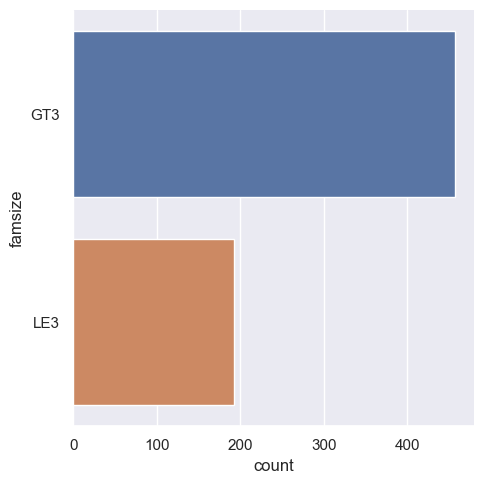

In [16]:
sb.catplot(y = "famsize", data = df_first, kind = "count", order = ["GT3", "LE3"])

The family size distribution is lopsided in favor of "greater than 3". This is important to note since we're carrying this over into the variable bigFam.

In [22]:
df_first["Pstatus"].value_counts()

T    569
A     80
Name: Pstatus, dtype: int64

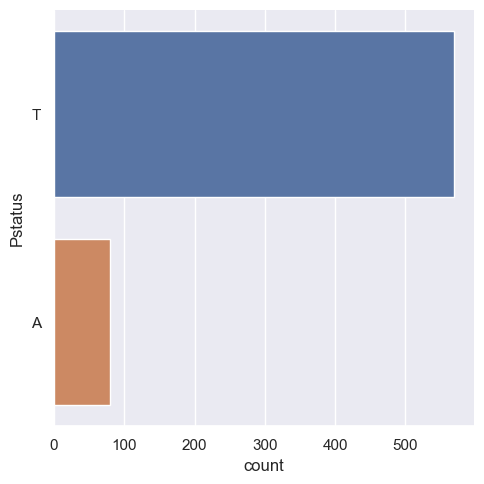

In [17]:
sb.catplot(y = "Pstatus", data = df_first, kind = "count", order = ["T", "A"])

The parental status is an extremely skewed variable, with the vast majority of students having their parents living together. Variables like this necessitate resampling in order to find their impact on final grades.

In [23]:
df_first["Mjob"].value_counts()

other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

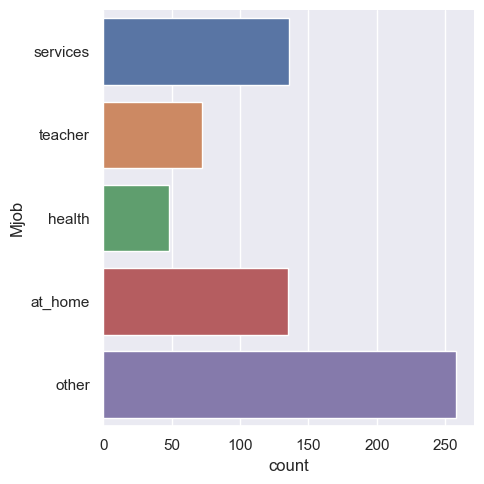

In [30]:
sb.catplot(y = "Mjob", data = df_first, kind = "count", order = ["services", "teacher", "health", "at_home", "other"])

In [24]:
df_first["Fjob"].value_counts()

other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

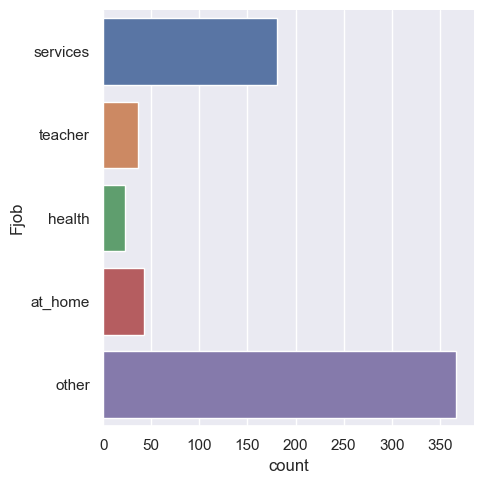

In [31]:
sb.catplot(y = "Fjob", data = df_first, kind = "count", order = ["services", "teacher", "health", "at_home", "other"])

For the job variables, we look specifically at the at_home value, since it is what we're using to determine the variables M_employed and F_employed. We can see that almost all fathers are employed: of all 649 entries, only 42 fall under "at_home". Meanwhile, Mjob has 135 "at_home" values, around 20% of the total sample. These variables, especially F_employed, may not be as helpful for predicting student grades due to their skewed distributions.

In [29]:
df_first["famsup"].value_counts()

yes    398
no     251
Name: famsup, dtype: int64

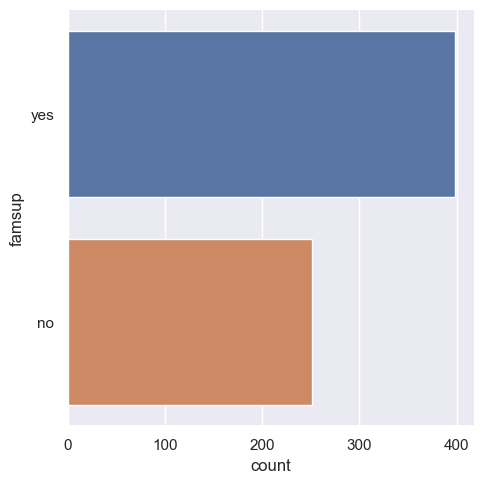

In [32]:
sb.catplot(y = "famsup", data = df_first, kind = "count", order = ["yes", "no"])

Finally, famsup has a fairly even distribution, meaning it should prove to be a more effective predictor in our future analysis.

Now we can move on to the numeric variables. These variables have a small number of discrete outputs, so a count plot would work well for visualization.

In [11]:
df_first["Fedu"].describe()

count    649.000000
mean       2.306626
std        1.099931
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

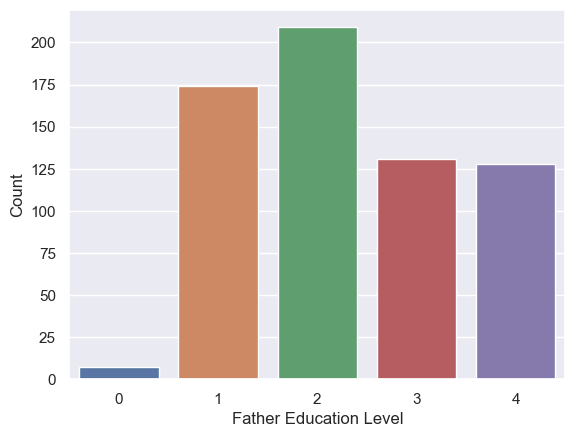

In [12]:
sb.countplot(x=df_first["Fedu"])
plt.xlabel('Father Education Level')
plt.ylabel('Count')
plt.show()

<Axes: >

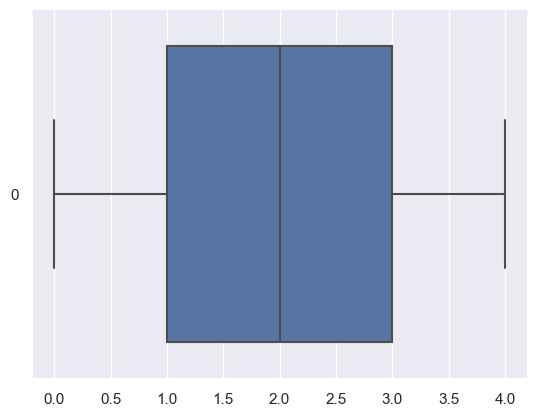

In [27]:
sb.boxplot(data = df_first["Fedu"], orient="h")

From the boxplot, the father's education level seems to be evenly distributed, with the mean being at level 2/4, the first quartile at 1/4, and the third quartile at 3/4.

In [13]:
df_first["Medu"].describe()

count    649.000000
mean       2.514638
std        1.134552
min        0.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

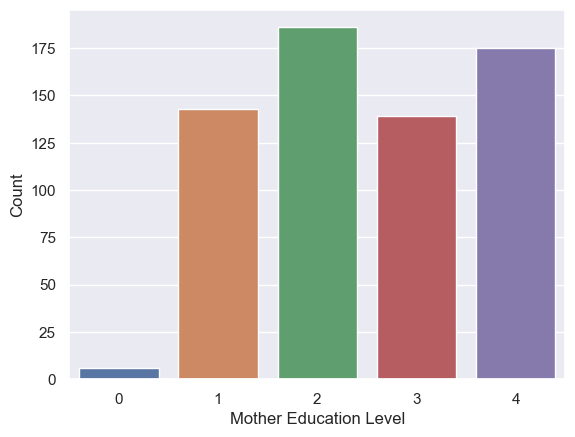

In [14]:
sb.countplot(x=df_first["Medu"]) 
plt.xlabel('Mother Education Level')
plt.ylabel('Count')
plt.show()

<Axes: >

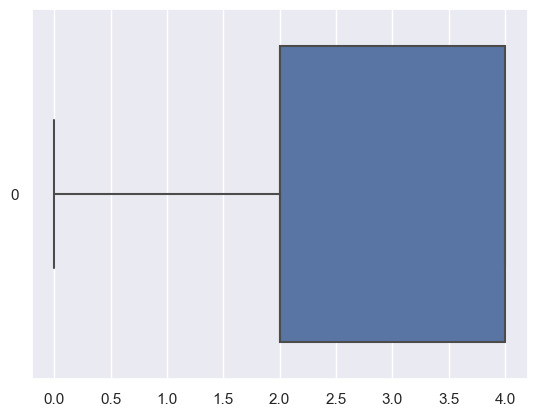

In [28]:
sb.boxplot(data = df_first["Medu"], orient="h")

The distribution of the mother's education level appears to be more lopsided. The first quartile is the same as the mean at level 2/4, meaning the overall distribution of levels is skewed more to the right. Comparing the count plots, there are less level 1 entries compared to Fedu, and many more level 4 entries.

In fact, the third quartile is at level 4, meaning it comprises at least a quarter of all values. This means that the atLeast1EduParent variable (requiring at least 1 parent to have education level 4) will not be too skewed in one direction.

In [5]:
df_first["G3"].describe()

count    649.000000
mean      11.906009
std        3.230656
min        0.000000
25%       10.000000
50%       12.000000
75%       14.000000
max       19.000000
Name: G3, dtype: float64

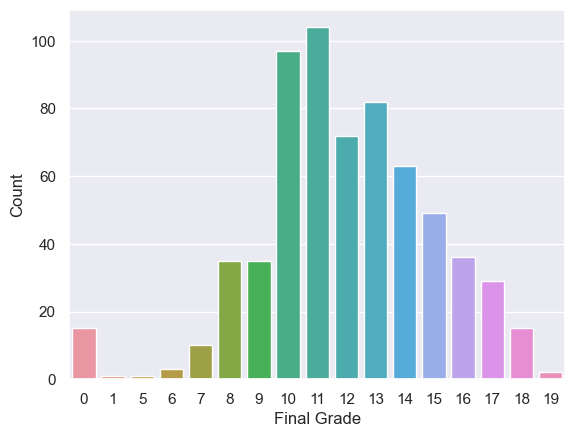

In [7]:
sb.countplot(x=df_first["G3"])
plt.xlabel('Final Grade')
plt.ylabel('Count')
plt.show()

<Axes: >

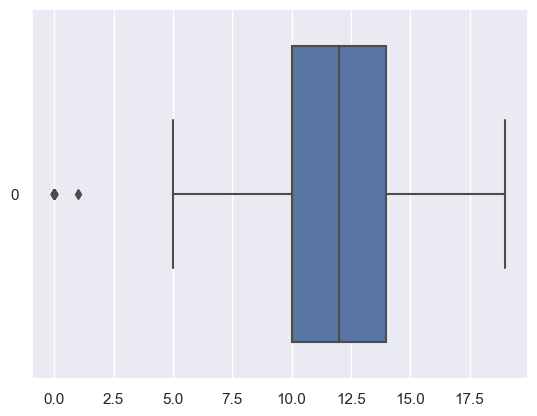

In [30]:
sb.boxplot(data=df_first["G3"], orient="h")

The final grade is more interesting to analyze, as it ranges from 0 to 20, although no student scored a 20 in this dataset. The distribution seems skewed slightly to the right: 10 is the midpoint of the possible values, but it ends up as the first quartile, with the mean instead being 12. Also interesting is the outlier on the left side of the plot: in the count plot, scores 2 through 4 were omitted entirely because no students scored in this range, but many more students scored a 0.

In [9]:
df_second.head()

,BigFamily,ParentsLivingTogether,AtLeast1EducatedParent,ParentEducationGap,M_employed,F_employed,SupportedByFamily,GoodFamilyRelation,PerformedWell
0,1,0,1,0,0,1,0,1,0
1,1,1,0,0,0,1,1,1,0
2,0,1,0,0,0,1,0,1,0
3,1,1,1,1,1,1,1,1,0
4,1,1,0,0,1,1,1,1,0


The second dataframe contains 9 numerical variables, all of which are either 0 or 1. We're aiming to check for links between PerformedWell and the other variables, so we can use a heatmap to check the linear correlations.

<Axes: >

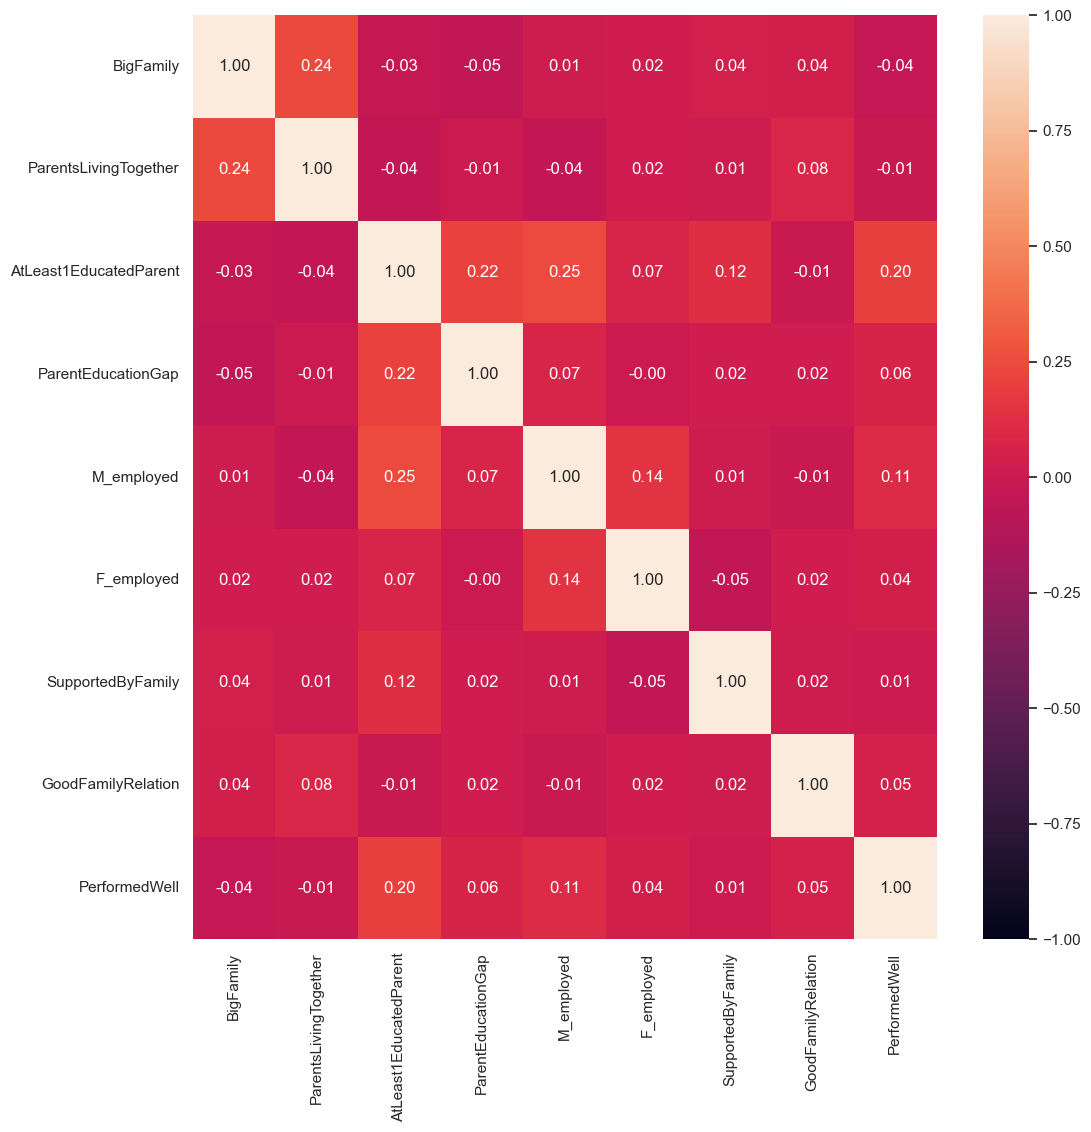

In [14]:
f = plt.figure(figsize=(12,12))
sb.heatmap(df_second.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")

The relation between PerformedWell and AtLeast1EducatedParent is relatively higher than all other variables, at 0.20. This is twice as high as the next strongest relation of 0.11 (M_employed). While this could be an indicator that this variable is more important, the linear relation is still not very strong.

From here, we proceed into more advanced methods to better determine the relationship between these variables and PerformedWell.